In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('T200-Public-Performance-Data-10-20V-September-2019.xlsx', sheet_name='12 V') 
df.head()

,PWM (µs),RPM,Current (A),Voltage (V),Power (W),Force (Kg f),Efficiency (g/W)
0,1100,2975.711667,17.031667,12,204.38,-2.903745,14.207466
1,1104,2968.960000,17.080000,12,204.96,-2.916597,14.230077
2,1108,2970.720000,16.760000,12,201.12,-2.893917,14.389006
3,1112,2932.790000,16.520000,12,198.24,-2.830414,14.277714
4,1116,2916.050000,16.080000,12,192.96,-2.785055,14.433328


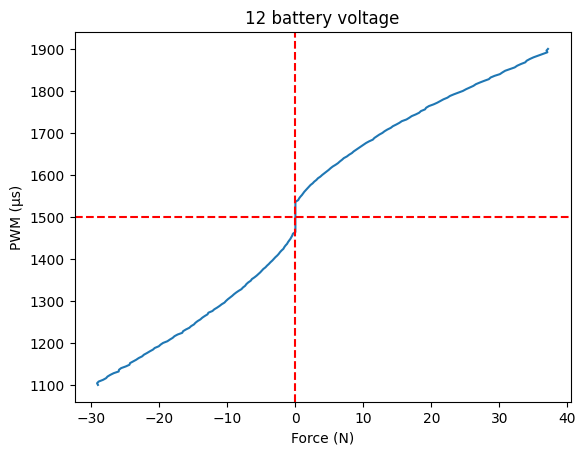

In [4]:
import matplotlib.pyplot as plt
plt.plot(10*df[' Force (Kg f)'], df[' PWM (µs)'])
plt.title("12 battery voltage")
plt.xlabel("Force (N)")
plt.ylabel("PWM (µs)")

plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=1500, color='r', linestyle='--')
# show the plot
plt.show()


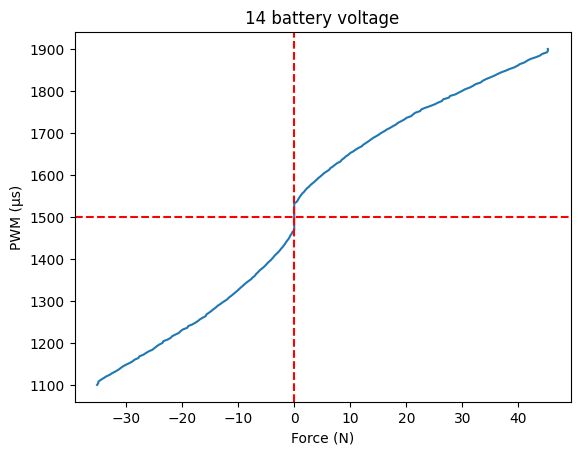

In [5]:
df = pd.read_excel('T200-Public-Performance-Data-10-20V-September-2019.xlsx', sheet_name='14 V') 
import matplotlib.pyplot as plt
plt.plot(10*df[' Force (Kg f)'], df[' PWM (µs)'])
plt.title("14 battery voltage")
plt.xlabel("Force (N)")
plt.ylabel("PWM (µs)")

plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=1500, color='r', linestyle='--')
# show the plot
plt.show()

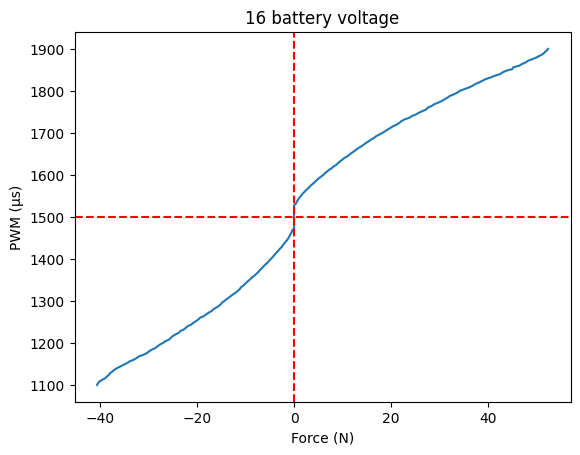

In [6]:
df = pd.read_excel('T200-Public-Performance-Data-10-20V-September-2019.xlsx', sheet_name='16 V') 
plt.plot(10*df[' Force (Kg f)'], df[' PWM (µs)'])
plt.title("16 battery voltage")
plt.xlabel("Force (N)")
plt.ylabel("PWM (µs)")

plt.axvline(x=0, color='r', linestyle='--')
plt.axhline(y=1500, color='r', linestyle='--')
# show the plot
plt.show()

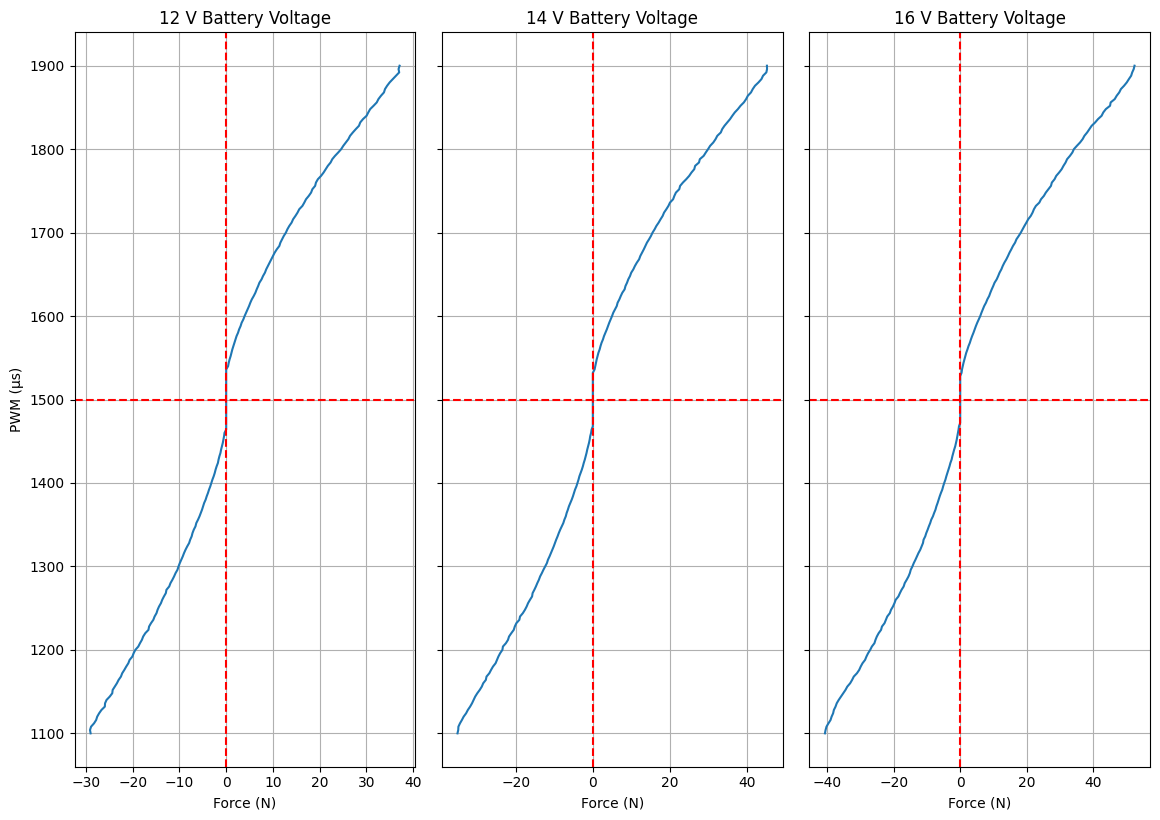

In [7]:
df_12V = pd.read_excel('T200-Public-Performance-Data-10-20V-September-2019.xlsx', sheet_name='12 V')
df_14V = pd.read_excel('T200-Public-Performance-Data-10-20V-September-2019.xlsx', sheet_name='14 V')
df_16V = pd.read_excel('T200-Public-Performance-Data-10-20V-September-2019.xlsx', sheet_name='16 V')
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11.7, 8.3), sharey=True)

axs[0].plot(10*df_12V[' Force (Kg f)'], df_12V[' PWM (µs)'])
axs[0].set_title("12 V Battery Voltage")
axs[0].set_xlabel("Force (N)")
axs[0].set_ylabel("PWM (µs)")
axs[0].axvline(x=0, color='r', linestyle='--')
axs[0].axhline(y=1500, color='r', linestyle='--')
axs[0].grid()

axs[1].plot(10*df_14V[' Force (Kg f)'], df_14V[' PWM (µs)'])
axs[1].set_title("14 V Battery Voltage")
axs[1].set_xlabel("Force (N)")
axs[1].axvline(x=0, color='r', linestyle='--')
axs[1].axhline(y=1500, color='r', linestyle='--')
axs[1].grid()

axs[2].plot(10*df_16V[' Force (Kg f)'], df_16V[' PWM (µs)'])
axs[2].set_title("16 V Battery Voltage")
axs[2].set_xlabel("Force (N)")
axs[2].axvline(x=0, color='r', linestyle='--')
axs[2].axhline(y=1500, color='r', linestyle='--')
axs[2].grid()

fig.tight_layout()
plt.show()


(186, 7)
(201, 7)
(93, 7)
(93, 7)
(186,)
(186,)


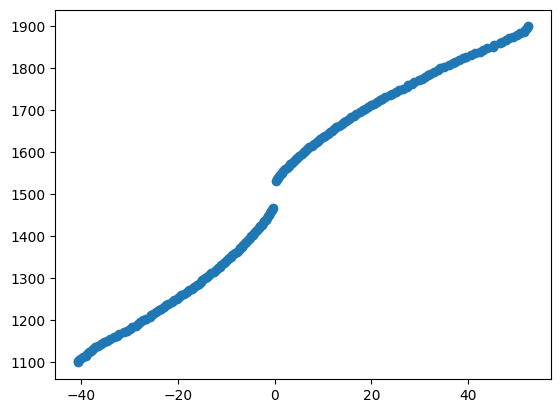

In [8]:
#linear interpolation (regression)
df0 = df[df[' Force (Kg f)']!=0] #filter the 0 on x axis
print(df0.shape)
print(df.shape)

pos_df = df0[df0[' Force (Kg f)']>0] #x>0
neg_df = df0[df0[' Force (Kg f)']<0] #x<0

print(pos_df.shape)
print(neg_df.shape)

y = np.array(df0[' PWM (µs)'].to_list())
x = 10*np.array(df0[' Force (Kg f)'].to_list())
print(y.shape)
print(x.shape)
plt.scatter(x,y)


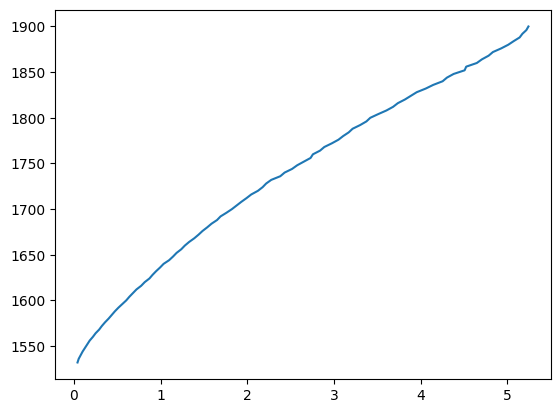

In [9]:
plt.plot(pos_df[' Force (Kg f)'], pos_df[' PWM (µs)'])

pos--m,c 6.660955443377915 1563.8915056025257
neg--m,c 8.556474591368378 1437.5105488646345


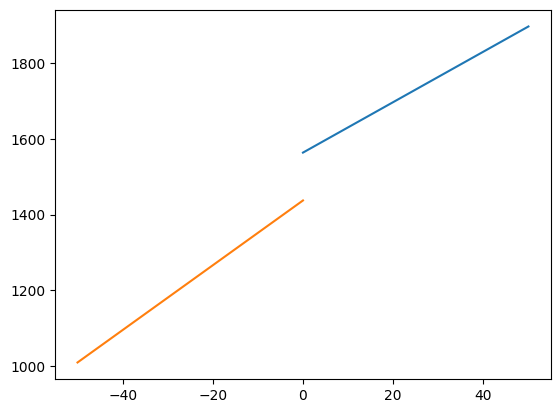

In [10]:
def linear_interpolate(df):
    x = 10*np.array(df[' Force (Kg f)'].to_list())
    y = np.array(df[' PWM (µs)'].to_list())
    
    #LINE EQN Y = MX +C
    
    N = y.shape[0] #NUMBER OP DATAPOINT
    m = (N*np.sum(np.multiply(x,y)) - np.sum(x)*np.sum(y))/ (N*np.sum(np.square(x)) - (np.sum(x)**2))
    c = (np.sum(y)-m*np.sum(x))/N
    return m,c

m1,c1 = linear_interpolate(pos_df)
print('pos--m,c', m1,c1)
x1 = np.linspace(0.0,50.0, 1000)
y1 = m1*x1 + c1 
plt.plot(x1,y1)

m2,c2 = linear_interpolate(neg_df)
print('neg--m,c', m2,c2)
x2 = np.linspace(-50,0,1000)
y2 = m2*x2 + c2
plt.plot(x2, y2)


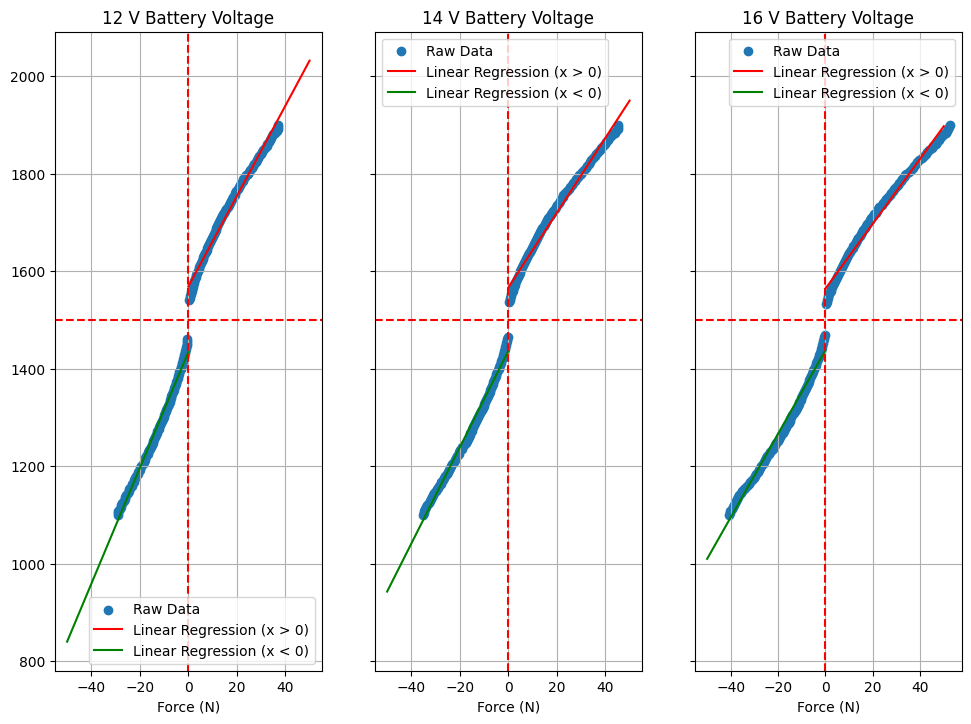

In [11]:
def linear_interpolate(df):
    x = 10*np.array(df[' Force (Kg f)'].to_list())
    y = np.array(df[' PWM (µs)'].to_list())
    
    #LINE EQN Y = MX +C
    
    N = y.shape[0] #NUMBER OP DATAPOINT
    m = (N*np.sum(np.multiply(x,y)) - np.sum(x)*np.sum(y))/ (N*np.sum(np.square(x)) - (np.sum(x)**2))
    c = (np.sum(y)-m*np.sum(x))/N
    return m,c

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11.7, 8.3), sharey=True)

for i, df in enumerate([df_12V, df_14V, df_16V]):
    df0 = df[df[' Force (Kg f)'] != 0]
    pos_df = df0[df0[' Force (Kg f)'] > 0]
    neg_df = df0[df0[' Force (Kg f)'] < 0]
    
    axs[i].scatter(10*df0[' Force (Kg f)'], df0[' PWM (µs)'], label='Raw Data')
    
    m_pos, c_pos = linear_interpolate(pos_df)
    x_pos = np.linspace(0.0, 50.0, 1000)
    y_pos = m_pos*x_pos + c_pos
    axs[i].plot(x_pos, y_pos, "r-", label='Linear Regression (x > 0)')
    
    m_neg, c_neg = linear_interpolate(neg_df)
    x_neg = np.linspace(-50, 0, 1000)
    y_neg = m_neg*x_neg + c_neg
    axs[i].plot(x_neg, y_neg, "g-", label='Linear Regression (x < 0)')
    
    axs[i].set_title(str(12 + 2*i) + " V Battery Voltage")
    axs[i].set_xlabel("Force (N)")
    axs[i].axvline(x=0, color='r', linestyle='--')
    axs[i].axhline(y=1500, color='r', linestyle='--')
    axs[i].legend()

    axs[i].grid()

plt.show()


In [12]:
m2*-15+c2

1309.1634299941088

In [13]:
#question 4,5,6 proportional controller

def p_control(kp=[5,5,5,5,5,5], state=[5,5,5,0,5,5], destination =[5,5,5,5,5,5], enable = [1,1,1,1,1,1], flotability = 0):
    if not len(kp)==len(state) and len(destination)==len(state):
        print(' error input')

    masked_kp = np.multiply(kp, enable)
    output = np.multiply(masked_kp,(np.array(destination)-np.array(state))) + np.array([0,0,flotability, 0, 0, 0])
    return output 

p_control()

array([ 0,  0,  0, 25,  0,  0])

In [14]:
global int_error 
int_error = np.array([0, 0, 0, 0, 0, 0], dtype = 'float64')

def PI_control(Kp= [5,5,5,5,5,5] ,state = [5,5,5,5,5,5],destination = [5,5,5,5,5,5], Ki = [5,5,5,5,5,5], enable = [1,1,1,1,1,1], floatability = 0, dt = 0.001):
    global int_error
    P_control = p_control(Kp, state, destination, enable, floatability)
    error = np.array(destination) - np.array(state)
    int_error += error*dt
    output = P_control + int_error*Ki

    return output

PI_control()

array([0., 0., 0., 0., 0., 0.])

In [15]:
global prev_error
prev_error = np.array([0, 0, 0, 0, 0, 0], dtype = 'float64')

def PID_control(Kp= [5,5,5,5,5,5] ,state = [5,5,5,5,5,5],destination = [5,5,5,5,5,5], Ki = [5,5,5,5,5,5], Kd = [5,5,5,5,5,5], enable = [1,1,1,1,1,1], floatability = 0, dt = 0.001):
    global prev_error

    pi_control = PI_control(Kp, state, destination, Ki, enable, floatability)
    error = np.array(destination) - np.array(state)
    diff_error = (error-prev_error)/dt
    output = pi_control + np.multiply(pi_control,Kd)
    prev_error = error
    return output

PID_control()

array([0., 0., 0., 0., 0., 0.])

(3479,)
(6, 3479)


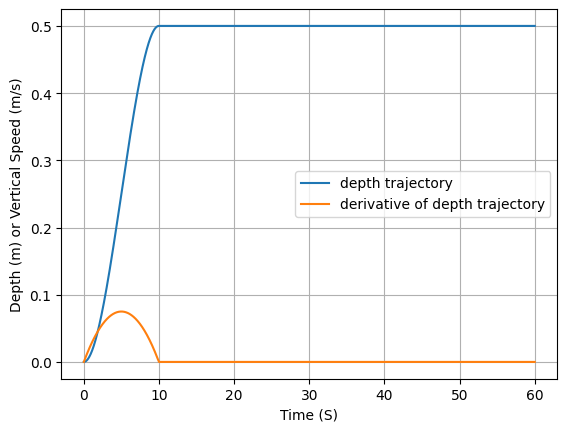

In [58]:
def trajectory( t ,state_init=[5,5,5,5,5,5], state_final=[5,5,5,5,5,5], t_final=20, enable=[1,1,1,1,1,1]):
    # t = np.array(t)
    # t = t[t<=t_final]

    a2 = 3*(np.array(state_final) - np.array(state_init))/(t_final**2)
    a3 = -2*(np.array(state_final)-np.array(state_init))/(t_final**3)
    
    output = np.array(state_init).reshape(6,1) + np.multiply(np.reshape(a2, (6,1)), t**2) + np.multiply(np.reshape(a3, (6,1)), t**3)
    derivative = np.array(state_init).reshape(6,1) + 2*np.multiply(np.reshape(a2, (6,1)), t) + 3*np.multiply(np.reshape(a3, (6,1)), t**2)
    
    return output, derivative

def trajectory_gen(t_final=10, mission_time=60, state_init = [0,0,0,0,0,0], state_final=[0.5,2,5,0,4,0], dt=1/58):
    t = np.linspace(0, t_final, int(t_final/dt))
    
    traj, der = trajectory(t, state_init, state_final, t_final)

    t_steady = np.linspace(t_final, mission_time, int((mission_time-t_final)/dt))
    t_steady = t_steady[1:]
    N = t_steady.shape[0]
    aa = np.array(state_final).reshape((6,1))
    state_steady = np.multiply(np.array(state_final).reshape((6,1)), np.ones((6, N)))
    steady_state_der = np.multiply(np.array(state_final).reshape((6,1)), np.zeros((6, N)))

    return np.concatenate((traj, state_steady), axis =1), np.concatenate((der, steady_state_der), axis =1) 

# t_final = 
t = np.linspace(0, 60, int(60*58)-1)
print(t.shape)

traj, der = trajectory_gen()
print(traj.shape)
for i in range(1):
    plt.plot(t,traj[i, :], label='depth trajectory')
    plt.plot(t,der[i,:], label='derivative of depth trajectory')
    plt.xlabel("Time (S)")
    plt.ylabel("Depth (m) or Vertical Speed (m/s)")
    plt.legend(loc=0)


plt.grid()        

In [17]:
a = np.reshape(np.array([1,2,3]),(3,1))
b = np.ones((6,7))


In [18]:
a = np.linspace(1,10,10)
a[a<5]

array([1., 2., 3., 4.])